## 분류형 선형 모델

- 이진분류 : 기존 선형 회귀와 비슷하나 가중치 합을 사용하지 않고 예측한 값의 임계치를 비교
    - 0 / 1로 구분한다
- 회귀 선형 모델에선 yhat은 특성의 선형 함수 였으나 분류형에선 결정 경계가 입력의 선형 함수
    - 선을 이용해 두개를 구분하는 함수
- 로지스틱 회귀와 서포트 벡터머신이 있다
- 규제의 강도를 결정하는 것은 매개변수 C 이다
- C의 값이 높아지만 규제가 감수한다. 즉 모델은 훈련세트에 최대로 맞추려 한다
    - C의 값이 높으면 개개의 데이터 포인트를 정확히 분류하려고 노력
- 반대로 C의 값을 낮추면 모델은 계수 백터가 0에 가까워지도록 만든다.
    - C의 값이 낮아지면 포인트중 다수를 맞추려고 한다

1. 임포트 하기
    - from sklearn.linear_model import LogisticRegreesion
    - from sklearn.svm import LinearSVC
    - from sklearn.model_selection import train_test_split

2. 모델 적용하기
    
    2.1 테스트 트레인셋 나누기
    - X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    2.2 모델 적용하기
    - logreg = LogisticRegression().fit(X_train, y_train)
        -()안에 C= 로 매개변수를 줄 수 있다.
        - penalty라는 변수에는 기본값이 l2로 되어있고 필요시 l1으로 조정할 수 있다.
        - l1규제 l2 규제 찾아볼것.

3. 모델 확인하기 : score, coef_, intercept_
    

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill= False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    # first_axis, second_axis 
    # X 0번 칼럼, X 1번 칼럼 이렇게. 즉 2칼럼으로 되어있는 데이터 프레임의 칼럼을 각각 X1, X2 로 둔 셈
    # 그리고 그에 따르는 y 값
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
import mglearn

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

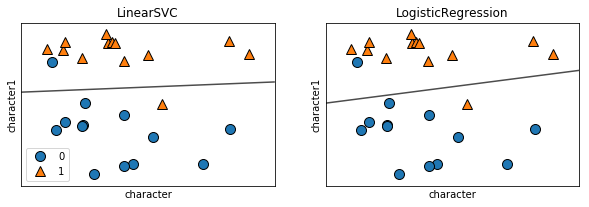

In [10]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel("character")
    ax.set_ylabel("character1")
axes[0].legend()

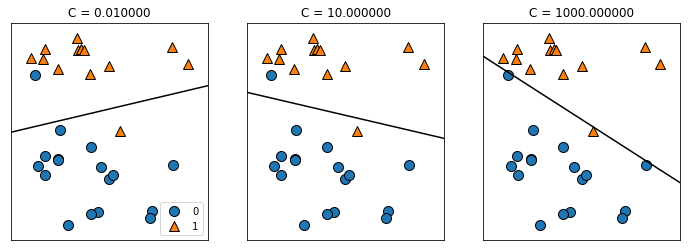

In [19]:
mglearn.plots.plot_linear_svc_regularization()

In [20]:
from sklearn.datasets import load_breast_cancer

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [30]:
logreg = LogisticRegression().fit(X_train, y_train)

In [31]:
print ('score: {}'.format(logreg.score(X_train, y_train)))
print ('test scroe {}'.format(logreg.score(X_test, y_test)))

score: 0.9553990610328639
test scroe 0.958041958041958


In [32]:
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)

In [33]:
print ('score 100 {}'.format(logreg100.score(X_train, y_train)))
print ('score 100 test {}'.format(logreg100.score(X_test, y_test)))

score 100 0.971830985915493
score 100 test 0.965034965034965


In [34]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)

In [35]:
print ('score 001 {}'.format(logreg001.score(X_train, y_train)))
print ('score 001 test {}'.format(logreg001.score(X_test, y_test)))

score 001 0.9342723004694836
score 001 test 0.9300699300699301


In [46]:
range(cancer.data.shape[1])

range(0, 30)

In [47]:
plt.figure()

In [53]:
name = ['kig','haer','lis']

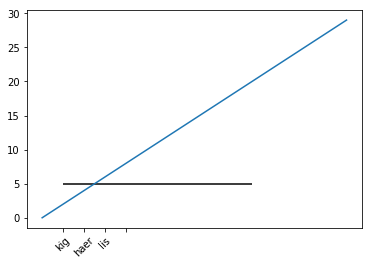

In [61]:
plt.plot(np.arange(30))
plt.xticks(range(2,10,2), name, rotation = 45)
plt.hlines(5,20, range(2,10,2))

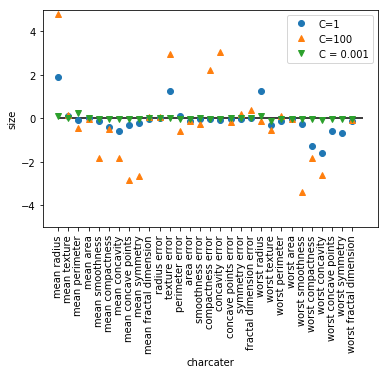

In [44]:
plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg100.coef_.T, '^', label = 'C=100')
plt.plot(logreg001.coef_.T, 'v', label = 'C = 0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('charcater')
plt.ylabel('size')
plt.legend()

In [62]:
from sklearn.linear_model import LogisticRegression

C=0.001인 로지스틱 회귀의 정확도 : 0.91
C =0.001인 로지스틱 회귀의 테스트 정확도 : 0.923077
C=1.000인 로지스틱 회귀의 정확도 : 0.96
C =1.000인 로지스틱 회귀의 테스트 정확도 : 0.958042
C=100.000인 로지스틱 회귀의 정확도 : 0.99
C =100.000인 로지스틱 회귀의 테스트 정확도 : 0.979021


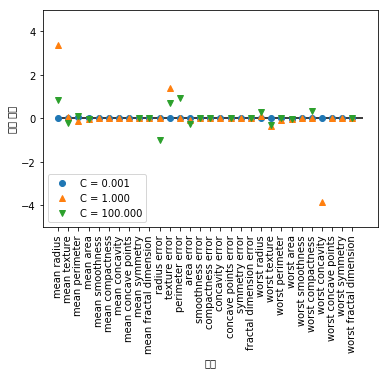

In [71]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print ('C={:.3f}인 로지스틱 회귀의 정확도 : {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print ('C ={:.3f}인 로지스틱 회귀의 테스트 정확도 : {:2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('특성')
plt.ylabel('게수 크기')

plt.ylim(-5, 5)
plt.legend(loc = 3)

# 다중 클래스 이진분류

In [72]:
from sklearn.datasets import make_blobs

In [73]:
X, y = make_blobs(random_state = 42)

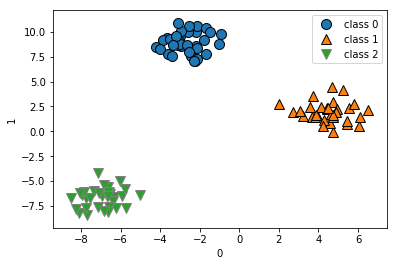

In [86]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel('0')
plt.ylabel('1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [87]:
linear_svm = LinearSVC().fit(X, y)
print ('size {}'.format(linear_svm.coef_.shape))
print ('size2 {}'.format(linear_svm.intercept_.shape))

size (3, 2)
size2 (3,)


In [88]:
linear_svm.coef_

array([[-0.1749199 ,  0.23140456],
       [ 0.47621894, -0.06937336],
       [-0.18914108, -0.20400515]])

In [92]:
np.linspace(-15, 15).shape

(50,)

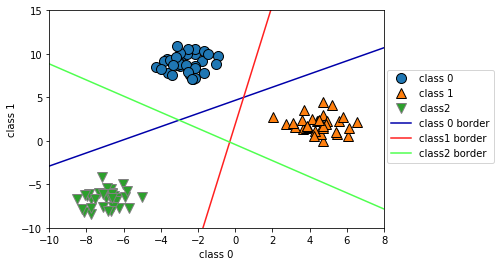

In [93]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15) # -15, 15까지 숫자
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('class 0')
plt.ylabel('class 1')
plt.legend(['class 0', 'class 1', 'class2', 'class 0 border', 'class1 border', 'class2 border'], loc = (1.01, 0.3))

In [104]:
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    #print ((line * coef[0] + intercept) / coef[1])
    print (coef[0] , coef[1])
    print (coef.shape)

-0.17491990321 0.23140455706
(2,)
0.476218942017 -0.0693733560648
(2,)
-0.189141084831 -0.204005151574
(2,)


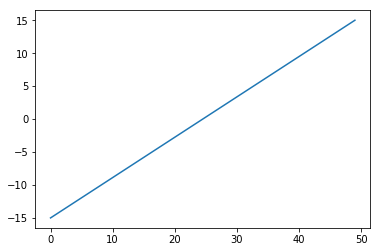

loc : int or string or pair of floats, default: 'upper right'
    The location of the legend. Possible codes are:

        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10

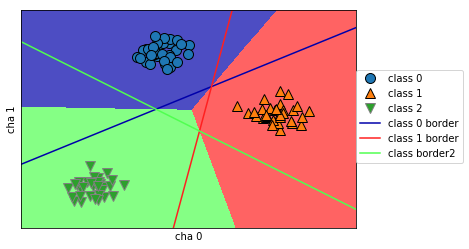

In [121]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line *  coef[0] + intercept) / coef[1], c = color)
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 border', 'class 1 border', 'class border2'], loc = (1,0.3))
plt.xlabel('cha 0')
plt.ylabel('cha 1')

In [79]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

In [23]:


cancer.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [15]:
ex = np.arange(10)
ex1 = np.arange(1,20, 3)
exe2 = np.arange(20, 30, 3)

In [18]:
exe2

array([20, 23, 26, 29])

In [16]:
ex

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
ex1

array([ 1,  4,  7, 10, 13, 16, 19])

In [17]:
for i in zip([ex, ex1], exe2):
    print (i)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 20)
(array([ 1,  4,  7, 10, 13, 16, 19]), 23)
